In [1]:
# Create (infer) Bayesian Belief Network
# First prep dataset
# save to stata format to pass to R module
#    actually - looks like there are R methods for handling missing values!
# read in R and run bayesian inference code
# look at graph generation in R (doesn't scale well > N=10!)
# read results in python
# use to create network image snapshot
# and a d3js interactive graphic



In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re

from IPython.display import display

import Jupyter_module_loader
from utility import *

In [3]:
dataset_name = "W10_only"
df_list = ["BES_reduced"]#,"BES_reduced_with_na"]#,"BESnumeric"]

In [4]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()




In [5]:
%%time
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))

    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
#         globals()[df].replace(-1,np.nan,inplace=True)

(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

var_type (393, 13)
Wall time: 520 ms


In [ ]:
import rpy2.interface
%load_ext rpy2.ipython

In [3]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

BES_R_data_files = BES_data_folder + "R_data" + os.sep
if not os.path.exists( BES_R_data_files ):
    os.makedirs( BES_R_data_files )


In [15]:
dataset_name = "W6_only"

In [16]:
%%time

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
# dataset_description = manifest["Friendlier_Description"].values[0]
# dataset_citation = manifest["Citation"].values[0]
# dataset_start = manifest["Date_Start"].values[0]
# dataset_stop = manifest["Date_Stop"].values[0]
# dataset_wave = manifest["Wave No"].values[0]

BES_Panel = pd.read_stata( data_subfolder + dataset_filename )
print("BES_Panel", BES_Panel.shape )

####

BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
print("BES_numeric",  BES_numeric.shape )

var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    
####

BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
print("BES_non_numeric",  BES_non_numeric.shape )

BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
print("BES_reduced",  BES_reduced.shape )

BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
print("BES_reduced_with_na", BES_reduced_with_na.shape )

fname = data_subfolder + "new_old_col_names.pkl"
with open(fname, "rb") as f:
    new_old_col_names = pickle.load(f) 

BES_Panel (30073, 488)
BES_numeric (30073, 438)
var_type (488, 13)
BES_non_numeric (30073, 45)
BES_reduced (30073, 426)
BES_reduced_with_na (30073, 426)
Wall time: 8.5 s


In [17]:
# BES_data_folder = "../BES_analysis_data/"
# BES_code_folder = "../BES_analysis_code/"

In [18]:
# wave = "W13_only"

# BES_reduced = pd.read_hdf( BES_data_folder+"BES_reduced"+wave+".hdf", "BES_reduced"+wave )
# print("BES_reduced",  BES_reduced.shape )

# BES_numeric = pd.read_hdf( BES_data_folder+"BESnumeric"+wave+".hdf", "BESnumeric"+wave )
# print("BES_numeric",  BES_numeric.shape )

# fname = BES_data_folder+"cat_dictionary"+wave+".pkl"
# with open(fname, "rb") as f:
#     cat_dictionary = pickle.load( f )
    
# fname = BES_data_folder+"red_dropped_var"+wave+".pkl"
# with open(fname, "rb") as f: red_dropped_var = pickle.load( f )
    
# imputation_method = "median" # "mice", "softimpute", "median", ???
# imputed_file_name = "BES" + imputation_method + wave

# BES_imputed = pd.read_hdf( BES_data_folder + imputed_file_name  + ".hdf", imputed_file_name )
# print("BES_imputed",  BES_imputed.shape )

# var_type    = pd.read_hdf( BES_data_folder+"var_type"+wave+".hdf", "var_type" )
# print("var_type",  var_type.shape )

In [19]:
# limited_var_set = set(specific_vars).intersection(set(BES_reduced.columns))

In [20]:
# BES_Panel["xsexuality"].value_counts()

In [6]:
# len(new_old_col_names.keys())
# 443
# [new_old_col_names[x] for x in BES_reduced.columns]


In [6]:
# set(var_type[var_type["type"].apply(lambda x: x in [1,2,5])].index)

In [28]:
ordinal_vars = set(var_type[var_type["type"].apply(lambda x: x in [1,2,5])].index).intersection( set(BES_Panel.columns))

In [22]:
[x for x in BES_Panel.columns if "deficit" in x.lower()]

['deficitReduce', 'howToReduceDeficit']

In [23]:
reduced_set_of_variables = True
if reduced_set_of_variables:

    corr_vars = ["overseasAid__Strongly agree", "antiIntellectual__Strongly agree",
                 "refAreGood__Strongly agree","harkBack__Strongly agree", "happyEULeave__Extremely happy", "strongLeader__Strongly agree",
                 "redistSelf__Government should be less concerned about equal incomes",
                 "gayMarriage__Strongly agree",
                 "leftRight__Right", "radical__Strongly agree",
                 ]



    # efficacyPolCare__Strongly agree, overseasAid__Strongly agree, antiIntellectual__Strongly agree, refAreGood__Strongly agree
    # harkBack__Strongly agree, happyEULeave__Extremely happy, strongLeader__Strongly agree
    # blackEquality__Gone much too far, gayEquality__Gone much too far, femaleEquality__Gone much too far
    # immigSelf__Allow many more
    # redistSelf__Government should be less concerned about equal incomes

    matchString = "al[1-5]|lr[1-5]|ethno[1-6]|populism[1-6]|leftRight|discrim|efficacy|immigSelf|immigEcon|immigCultural|"+\
        "Equality|womenJobs|genderRoles|immigrantsWelfareState|grammar|renationaliseRail|polAttention|grammar|happyTrump|"+\
        "britishness|englishness|beliefTradeoff|prefTradeoff|trustMPs|deficit"

    Treatment = "Value_vars"
    specific_vars = [x for x in BES_reduced if re.match(matchString,x)]
   # specific_vars = [x for x in BES_reduced if re.match("al[1-5]|lr[1-5]|leftRight|lr_scale|al_scale",x)]
    specific_vars.extend(corr_vars)
    
    # filter out variables not in this dataset
    specific_vars_filtered = list(set(specific_vars).intersection(set(BES_reduced.columns)))

#     BES_reduced = BES_reduced[ specific_vars_filtered ]
#     BES_reduced_with_na = BES_reduced_with_na[ specific_vars_filtered ]
    display( specific_vars_filtered )

['lr3__Strongly agree',
 'lr2__Strongly agree',
 'efficacyNoMatter__Strongly agree',
 'efficacyPolCare__Strongly agree',
 'efficacyNotUnderstand__Strongly agree',
 'deficitReduce__It is completely necessary',
 'efficacyVoteEffort__Strongly agree',
 'lr1__Strongly agree',
 'al5__Strongly agree',
 'efficacyEnjoyVote__Strongly agree',
 'al1__Strongly agree',
 'trustMPs__A great deal of trust',
 'redistSelf__Government should be less concerned about equal incomes',
 'al3__Strongly agree',
 'leftRight__Right',
 'efficacyUnderstand__Strongly agree',
 'al4__Strongly agree',
 'lr5__Strongly agree',
 'polAttention__Pay a great deal of attention',
 'al2__Strongly agree',
 'lr4__Strongly agree',
 'efficacyTooMuchEffort__Strongly agree']

In [24]:
# # specific_vars_filtered.extend(['tuitionFeesTooFar__Gone much too far',
# #                                'redistSelf__Government should be less concerned about equal incomes',
# #                                'ageGroup__66+',
# #                                'profile_education_age__Still at school/Full time student',
# #                                'edlevel__Postgrad',
# #                                'profile_household_children__6 or more'
# #                                ])
# specific_vars_filtered.extend(['profile_education_age__Still at school/Full time student',
#  'privPrimSchoolW1_W4W7W9__Yes',
#  'privSecondSchoolW1_W4W7W9__Yes',
#  'neverPrivSchoolW1_W4W7W9__Yes'])

# specific_vars_filtered

In [576]:
# BES_reduced_with_na[ specific_vars_filtered ]

BES_export_to_R = BES_reduced_with_na[ specific_vars_filtered ]
#BES_export_to_R.columns = [new_old_col_names[x] for x in BES_export_to_R.columns]

BES_export_to_R = BES_export_to_R.rename(columns = new_old_col_names)

In [7]:
list_of_vars = list(set([new_old_col_names[x] if x in new_old_col_names.keys() else x for x in BES_reduced.columns]))
list_of_vars.remove("profile_disability")
list_of_vars


['majorityPartyLabW10',
 'changeImmigLabW1',
 'redistConW7',
 'likeConW7',
 'immigLabW8',
 'efficacyTooMuchEffortW6',
 'winConstituencyGreenW11',
 'efficacyNotUnderstandW6',
 'engFairShareW2',
 'partyMemberW8',
 'achieveReduceImmigUKIPW4',
 'expectAccessW11',
 'ptvGrnW10',
 'likeGoveW8',
 'socialIdentityGlobalRemainW8',
 'warmWhiteW11',
 'al_scaleW1W2W3W4W5',
 'riskUnemploymentW1',
 'partyIdW11',
 'changeCostLiveW4',
 'enviroProtectionW6',
 'britRespectLawW11',
 'EUIntegrationLDW11',
 'responsibleDebtUKBanksW1',
 'dutyToVote2W4',
 'lrConW12',
 'lrgreensW5',
 'achieveReduceImmigGrnW9',
 'smallPartyWastedVoteW11',
 'registeredW4',
 'cutsTooFarNationalW4',
 'conLookAfterMCW12',
 'econPersonalRetroW2',
 'euSources_99W7',
 'responsibleCrimeNoneW2',
 'scotFairShareW2',
 'efficacyTooMuchEffortW3',
 'fbUseW5',
 'responsibleImmigLibDemsW2',
 'dutyToVote2W7',
 'likeLabW7',
 'likeLDW8',
 'allSourceIncome_2W11',
 'efficacyTooMuchEffortW10',
 'noChanceCoalitionUKIPW11',
 'lr3W1W2W3W4W5',
 'knowf2f1

In [24]:
list_of_vars = list(set([new_old_col_names[x] if x in new_old_col_names.keys() else x for x in specific_vars_filtered ]))
list_of_vars

['lr1',
 'efficacyEnjoyVote',
 'lr4',
 'lr2',
 'al1',
 'lr3',
 'efficacyNoMatter',
 'efficacyPolCare',
 'efficacyTooMuchEffort',
 'efficacyVoteEffort',
 'leftRight',
 'al5',
 'deficitReduce',
 'al3',
 'lr5',
 'al4',
 'polAttention',
 'redistSelf',
 'efficacyUnderstand',
 'trustMPs',
 'efficacyNotUnderstand',
 'al2']

In [25]:
england_only = BES_Panel["country"]=="England"
BES_export_to_R = BES_Panel[england_only][list_of_vars]
BES_export_to_R = BES_export_to_R.apply(lambda x: x.astype('category'))
BES_export_to_R = BES_export_to_R.apply(lambda x: x.cat.remove_unused_categories())
BES_export_to_R = BES_export_to_R.apply(lambda x: x.cat.codes)
BES_export_to_R = BES_export_to_R.replace(-1,np.nan)

In [26]:
BES_export_to_R.columns

Index(['lr1', 'efficacyEnjoyVote', 'lr4', 'lr2', 'al1', 'lr3',
       'efficacyNoMatter', 'efficacyPolCare', 'efficacyTooMuchEffort',
       'efficacyVoteEffort', 'leftRight', 'al5', 'deficitReduce', 'al3', 'lr5',
       'al4', 'polAttention', 'redistSelf', 'efficacyUnderstand', 'trustMPs',
       'efficacyNotUnderstand', 'al2'],
      dtype='object')

In [27]:
BES_export_to_R.shape

(21811, 22)

In [29]:
# filename = dataset_name + "all_red_vars"
# filename = dataset_name + "more_core_values"
filename = dataset_name + "core_values"

BES_export_to_R.to_stata(BES_R_data_files + filename + ".dta")
display(filename)

'W6_onlycore_values'

In [5]:
dataset = "W13_reduced_with_nans"

BES_numeric.drop(red_dropped_var,axis=1).to_stata(BES_data_folder+"W13_reduced_with_nans.dta")

In [7]:
dataset = "W13_reduced"

BES_reduced.to_stata(BES_data_folder+"W13_reduced.dta")

C:\ANACON~1\envs\BES_analysis\lib\site-packages\pandas\io\stata.py:2001: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    b'partyIdStrength__Not very strong'   ->   partyIdStrength__Not_very_strong
    b'expectGoodConductGeneral__Expect 20xx election to be conducted unfairly'   ->   expectGoodConductGeneral__Expect
    b'polAttention__Pay a great deal of attention'   ->   polAttention__Pay_a_great_deal_o
    b'pidWeThey__Strongly agree'   ->   pidWeThey__Strongly_agree
    b'pidInterestedOthers__Strongly agree'   ->   pidInterestedOthers__Strongly_ag
    b'pidCriticiseParty__Strongly agree'   ->   pidCriticiseParty__Strongly_agre
    b'pidCommonParty__Strongly agree'   ->   pidCommonParty__Strongly_agree
    b'pidRuinDay__Strongly agree'   ->   pidRuinDay__Strongly_agree
    b'pidConnected__Strongly agree'   ->   pidConnected__Strongly_agree
    b'pidMyParty__Strongly agree'   ->   pidMyParty__Strongly_agre

In [30]:
# pass along the labels of non-ordinal variables
cols =  BES_numeric.drop(red_dropped_var,axis=1).columns
var_type.loc[cols][var_type.loc[cols]["type"]==3].to_stata((BES_data_folder+"W13_reduced_with_nans_factor_variables.dta"))

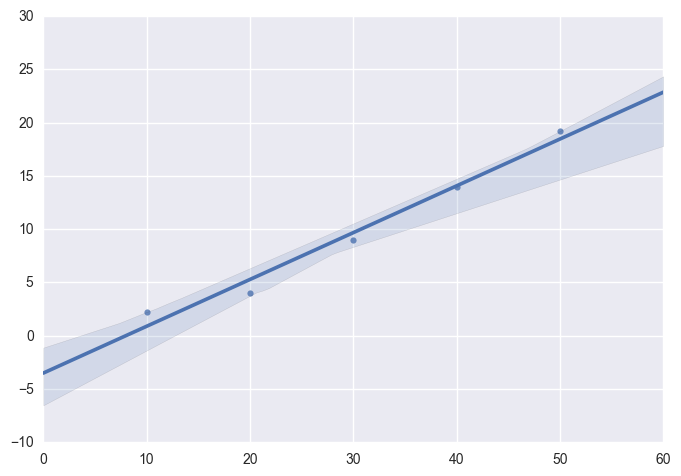

In [68]:
# time of the bnlearn function!
# 10:5s, 20:16s, 30: 80s, 40: 195.45s, 50: 369.05
y=np.sqrt( np.array([5,16,80,195.45, 369.05]) )
sns.regplot(x=np.array([10,20,30,40, 50]), y=y ,fit_reg=True)

# ( (x/2) -5 )^2
# x=120 -> 55^2 -> 3025 -> 50mins
# x=200 -> 95^2 -> 9025 -> 150mins
# x=300 -> 145^2 -> 21025 -> 350mins

In [3]:
BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W8_v1.3.dta")
print("BES_Panel",  BES_Panel.shape )
var_type    = pd.read_hdf( BES_data_folder+"var_type.hdf", "var_type" )
print("var_type",  var_type.shape )

BES_Panel (31409, 733)
var_type (4247, 1)


In [4]:
import load_url

In [11]:
# # helper to load url
# # runs webserver and loads url with webbrowswer module
# import sys

# def load_url(path):
#     PORT = 8000
#     httpd = StoppableHTTPServer(("127.0.0.1",PORT), handler)
#     thread.start_new_thread(httpd.serve, ())
#     webbrowser.open_new('http://localhost:%s/%s'%(PORT,path))
#     input("Press <RETURN> to stop server\n")
#     httpd.stop()
#     print("To restart server run: \n%s"%server)


# if sys.version_info[0] == 2:
#     import SimpleHTTPServer, BaseHTTPServer
#     import socket
#     import thread
#     import webbrowser
#     handler = SimpleHTTPServer.SimpleHTTPRequestHandler
#     input = raw_input
#     server = "python -m SimpleHTTPServer 8000"

#     class StoppableHTTPServer(BaseHTTPServer.HTTPServer):

#         def server_bind(self):
#             BaseHTTPServer.HTTPServer.server_bind(self)
#             self.socket.settimeout(1)
#             self.run = True

#         def get_request(self):
#             while self.run:
#                 try:
#                     sock, addr = self.socket.accept()
#                     sock.settimeout(None)
#                     return (sock, addr)
#                 except socket.timeout:
#                     pass

#         def stop(self):
#             self.run = False

#         def serve(self):
#             while self.run:
#                 self.handle_request()


# else:
#     import http.server, http.server
#     import socket
#     import _thread as thread
#     import webbrowser
#     handler = http.server.SimpleHTTPRequestHandler
#     server = "python -m http.server 8000"

#     class StoppableHTTPServer(http.server.HTTPServer):

#         def server_bind(self):
#             http.server.HTTPServer.server_bind(self)
#             self.socket.settimeout(1)
#             self.run = True

#         def get_request(self):
#             while self.run:
#                 try:
#                     sock, addr = self.socket.accept()
#                     sock.settimeout(None)
#                     return (sock, addr)
#                 except socket.timeout:
#                     pass

#         def stop(self):
#             self.run = False

#         def serve(self):
#             while self.run:
#                 self.handle_request()

In [5]:
import sys
sys.version_info[0]

3

In [6]:
BES_min = pd.read_hdf(BES_data_folder+"BESW8min.hdf")

BES_min.var().sort_values()
W9_vars = [x for x in BES_min.columns if "W9" in x]
BES_min.drop(W9_vars, axis=1, inplace=True)
BES_min.fillna(-1).to_stata(BES_data_folder+"BES2015_W8_v1.3_nan_minus1_allcat_allBrit.dta")

In [7]:
cat_vars = BES_Panel.columns[(var_type["type"]==3)]
# set( str_df["to"].values ).intersection( set(cat_vars))
# cat_vars

C:\ANACON~1\envs\BES_analysis\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 733 but corresponding boolean dimension is 4247
  result = getitem(key)


IndexError: index 756 is out of bounds for axis 1 with size 733

In [15]:
cat_vars_30 = list( set(BES_min.columns).intersection(set(cat_vars))  )
BES_min[cat_vars_30].fillna(-1).to_stata(BES_data_folder+"BES2015_W8_30_cats.dta")

In [16]:
BES_min = pd.read_stata(BES_data_folder+"BES2015_W8_v1.3_nan_minus1_allcat_allBrit.dta")
BES_min["euRefVote"].value_counts()

 1.0    14803
 0.0    14261
-1.0     2343
Name: euRefVote, dtype: int64

In [17]:
# trying to estimate the O(n) for the bnlearn programme by the number of variables
# a = np.sqrt( [1,10,25,60,130,210,345] )
# b = [10,20,30,40,50,60,70]
# z = a[3] + ((a[6]-a[3])/(b[6]-b[3])) * (290-b[3])
# z*z/3600

In [9]:
# LOAD NETWORK LINK STRENGTHS OUTPUT BY BNLEARN

# strengths = pd.read_csv("../../Bayesian Networks/bayes_net_data/strengths_allcats_allBrit.csv")
# strengths = pd.read_csv("LiberalDemocats_strengths.csv")
# strengths = pd.read_csv("LiberalDemocats_small_strengths.csv")
strengths = pd.read_csv("strengths_BES_Eng_EU_euRef0.csv")
# strengths = pd.read_csv("strengths_BES_Eng_EU_euRef1.csv")
# strengths = pd.read_csv("strengths_BES_Eng_EU_euRef-1.csv")
# strengths = pd.read_csv("strengths_BES_Eng_EU0.csv")
# strengths = pd.read_csv("../../Bayesian Networks/bayes_net_data/strengths_allcats.csv")

In [4]:
# new input


strengths = pd.read_csv("W13_reduced_with_nans_strengths.csv")

In [6]:
str_df = strengths.drop('Unnamed: 0',axis=1).sort_values(by="strength")

In [7]:
str_df["log_pos_strength"] = np.log(-str_df["strength"])
str_df["log_pos_strength"] = str_df["log_pos_strength"]+1-str_df["log_pos_strength"].min()

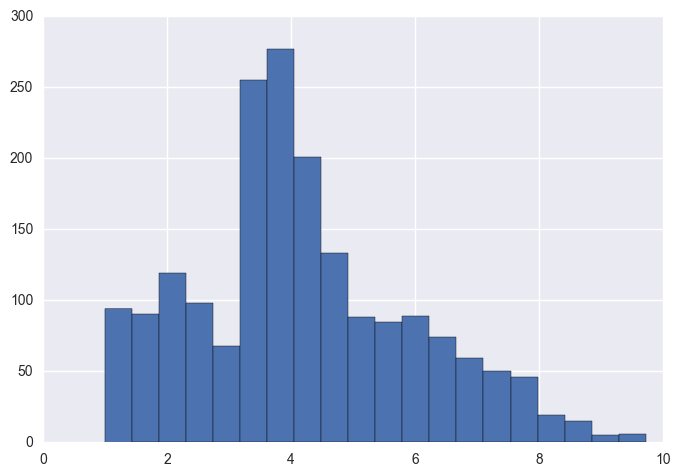

In [29]:
# log_positive_str = np.log(np.abs(str_df["strength"]))
# log_positive_str = log_positive_str - min(log_positive_str) +1
str_df["log_pos_strength"].hist(bins=20)

In [22]:
# to create and plot a network diagram in python
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx

In [30]:
min_strength = 6#3
max_strength = 9.35

G = nx.DiGraph( )
for i in str_df.index:
    if (str_df["log_pos_strength"].loc[i] > min_strength)  &  (str_df["log_pos_strength"].loc[i] < max_strength): # filter weak links
        G.add_node( str_df.loc[i]["from"] )
        G.add_node( str_df.loc[i]["to"]   )
        G.add_edge( str_df.loc[i]["from"] , str_df.loc[i]["to"] , weight=str_df["log_pos_strength"].loc[i]*2 )

In [44]:
export_for_gephi = str_df[ (str_df["log_pos_strength"]>min_strength) & (str_df["log_pos_strength"]<max_strength) ].copy()
export_for_gephi.drop("strength",axis=1,inplace=True)
export_for_gephi.columns = ["Source","Target","Weight"]

export_for_gephi.to_csv(BES_data_folder+dataset+"_strengths"+"_for_gephi"+".csv")


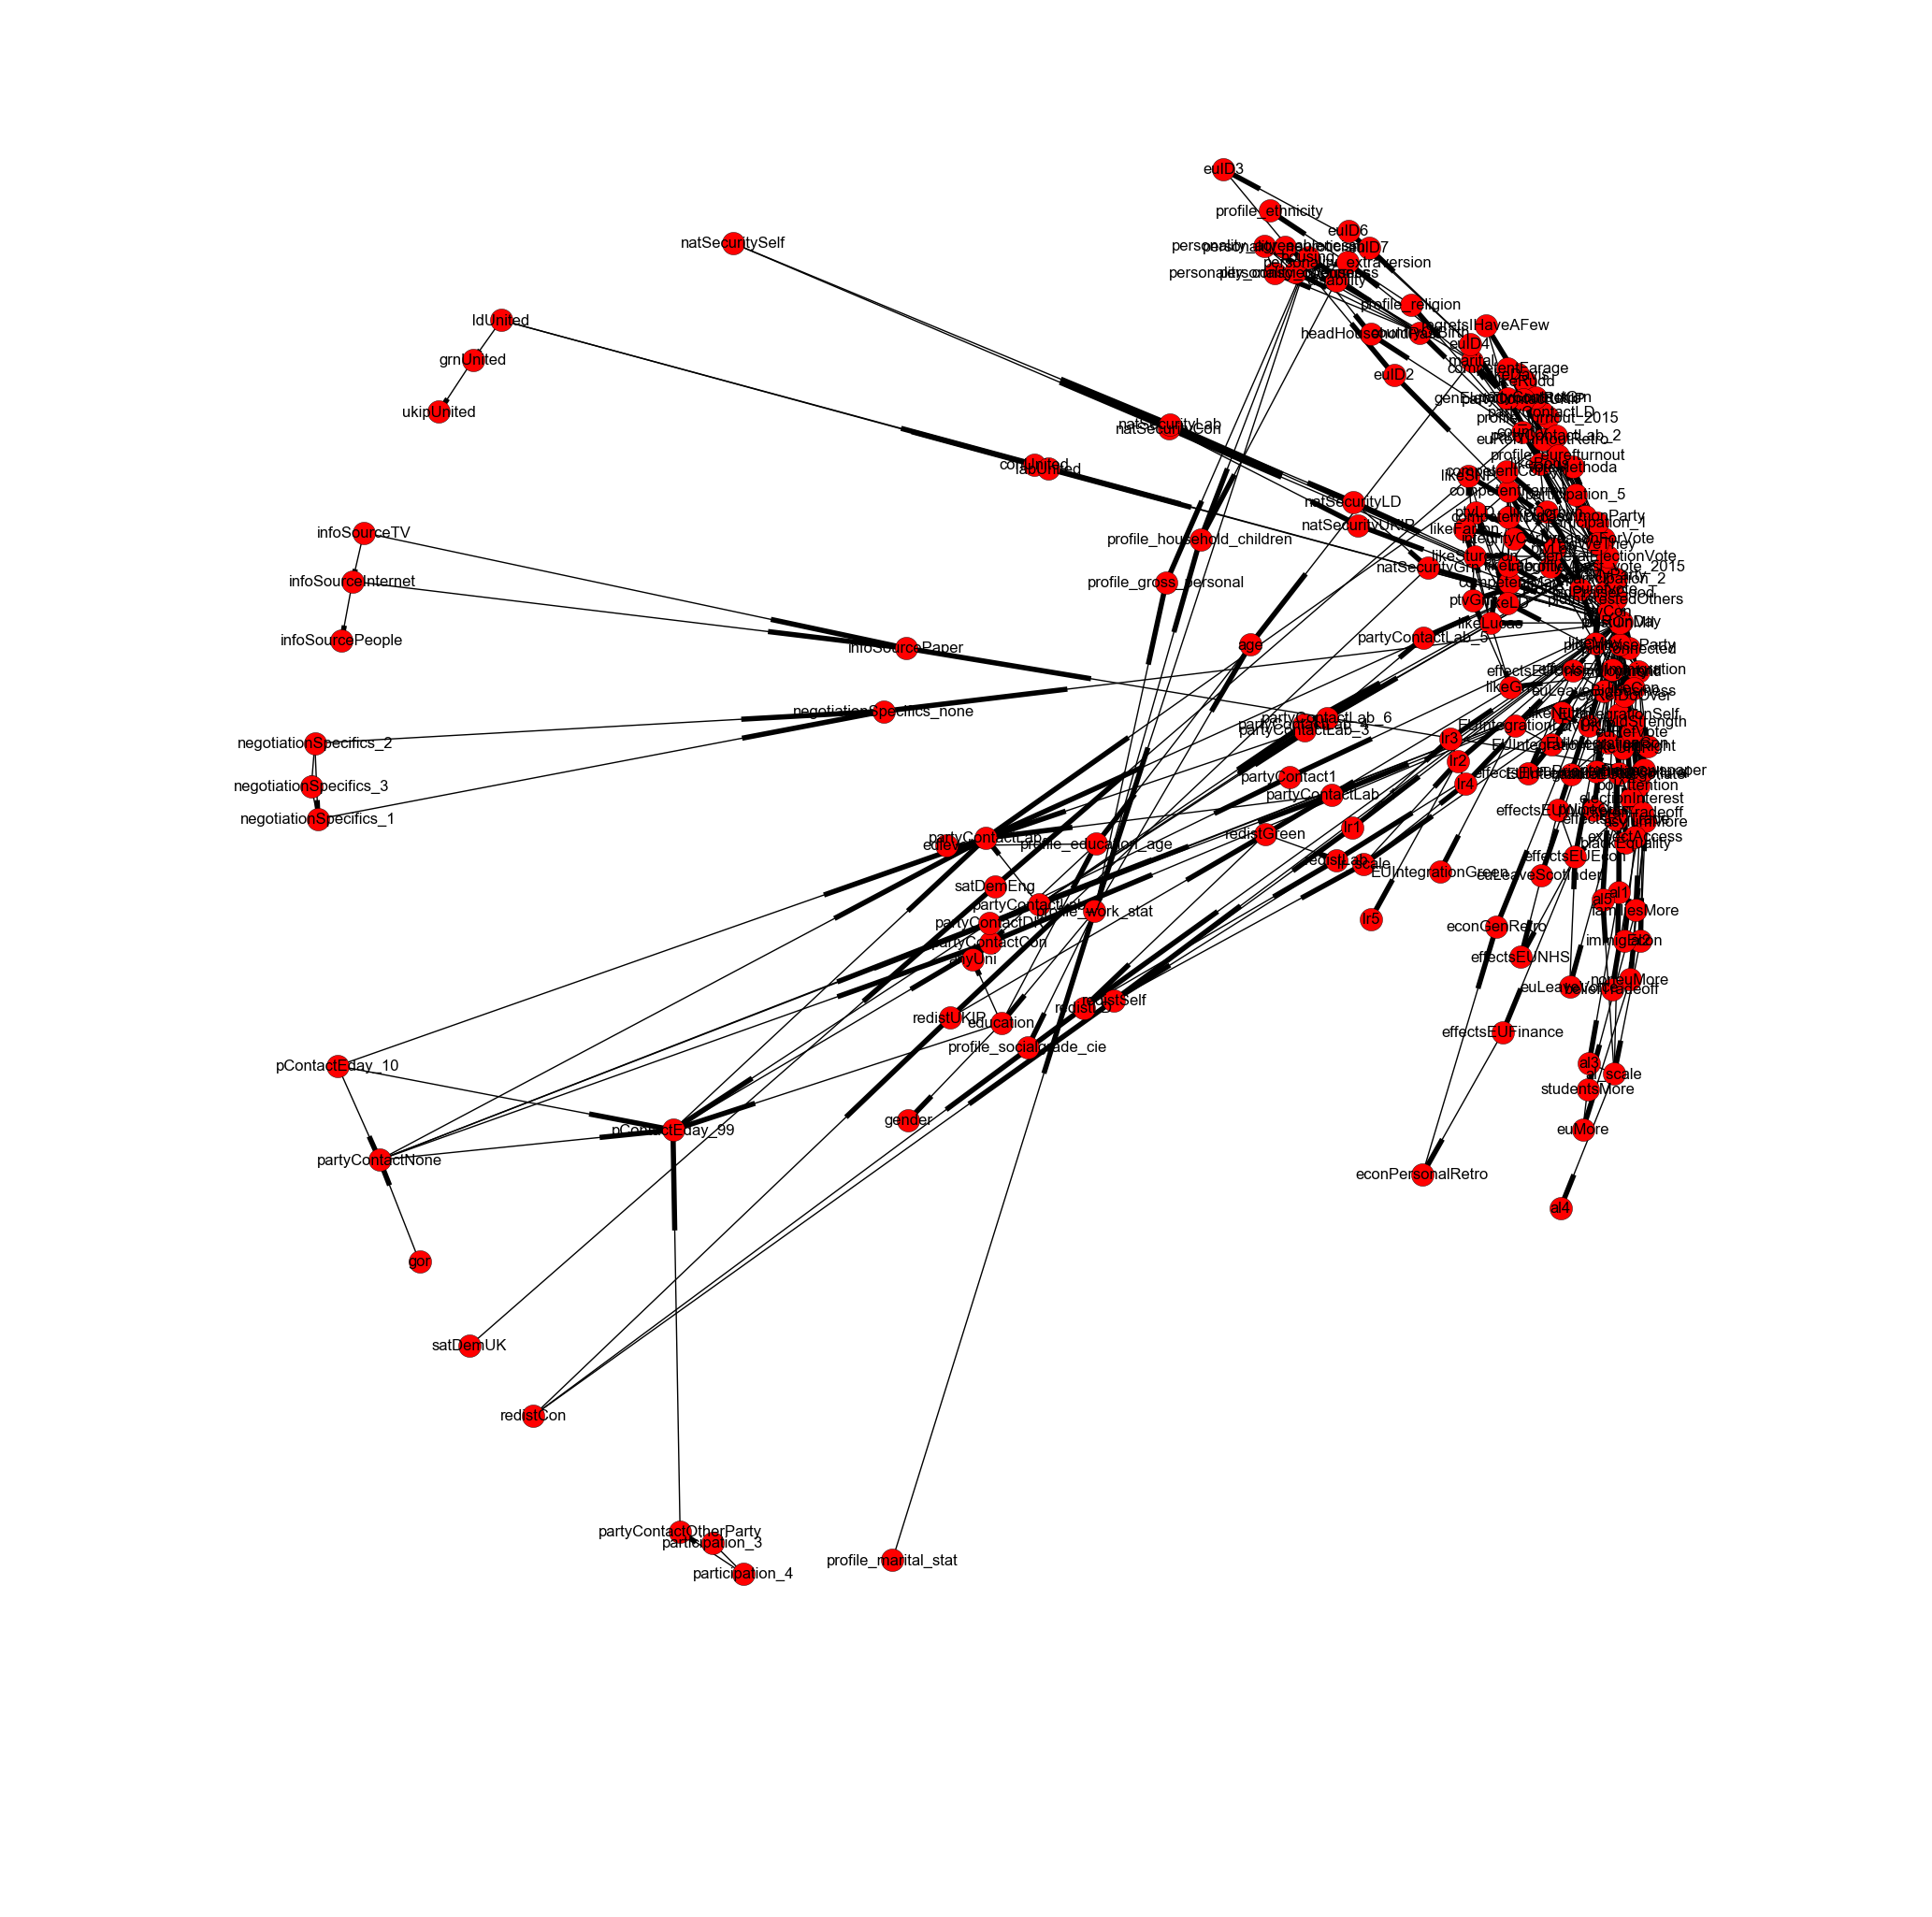

In [31]:
plt.figure(figsize=(20,20));
pos=nx.spring_layout(G,weight='weight')
nx.draw(G,pos, with_labels=True)

In [26]:
import json
from networkx.readwrite import json_graph

for n in G:
    G.node[n]['name'] = n

d = json_graph.node_link_data(G)
json.dump(d, open('force/force.json','w'))
json.dump(d, open('force/force_libdems.json','w'))

In [27]:
from load_url import load_url

In [28]:
# open 
load_url('force/force.html')


127.0.0.1 - - [07/Aug/2017 13:45:43] "GET /force/force.json HTTP/1.1" 200 -


Press <RETURN> to stop server

To restart server run: 
python -m http.server 8000
